<a href="https://colab.research.google.com/github/Itskindastrange/Red-Wine-Quality-/blob/main/Red_Wine_Quality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [5]:
wine= pd.read_csv('winequality-red.csv')

In [6]:
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#prepocess the data
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [10]:
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad


In [11]:
label_quality = LabelEncoder()

In [12]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [13]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [14]:
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<ipython-input-15-066c00c953c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='count', data=wine_quality_counts, palette='rainbow')


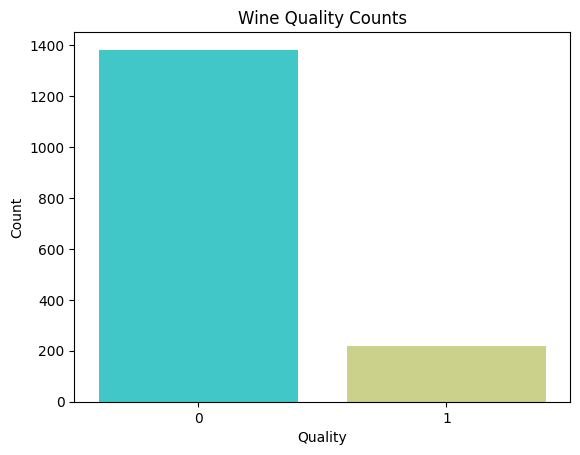

In [15]:
wine_quality_counts = wine['quality'].value_counts().reset_index()
wine_quality_counts.columns = ['quality', 'count']
sns.barplot(x='quality', y='count', data=wine_quality_counts, palette='rainbow')
plt.title('Wine Quality Counts')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


# Seperating **Data**

In [16]:

X = wine.drop('quality', axis=1)
y = wine['quality']


# TRAIN AND TEST DATA

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SCALING

In [18]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# CLASSIFERS


**Random Forest**

In [19]:
rfc= RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)

In [20]:
pred_rfc[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
pred_rfc.shape
report_rfc = classification_report(y_test, pred_rfc, output_dict=True)


In [43]:
print(report_rfc)


{'0': {'precision': 0.9295774647887324, 'recall': 0.967032967032967, 'f1-score': 0.947935368043088, 'support': 273}, '1': {'precision': 0.75, 'recall': 0.574468085106383, 'f1-score': 0.6506024096385542, 'support': 47}, 'accuracy': 0.909375, 'macro avg': {'precision': 0.8397887323943662, 'recall': 0.770750526069675, 'f1-score': 0.799268888840821, 'support': 320}, 'weighted avg': {'precision': 0.9032020246478872, 'recall': 0.909375, 'f1-score': 0.904264589777422, 'support': 320}}


In [23]:
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 20  27]]


# SVM CLASSIFIER

---



In [24]:
clf = SVC()
clf.fit(X_train, y_train)
pred_svm = clf.predict(X_test)

In [44]:
report_svm = classification_report(y_test, pred_svm, output_dict=True)
print(report_svm)
print(confusion_matrix(y_test, pred_svm))

{'0': {'precision': 0.8844884488448845, 'recall': 0.9816849816849816, 'f1-score': 0.9305555555555555, 'support': 273}, '1': {'precision': 0.7058823529411765, 'recall': 0.2553191489361702, 'f1-score': 0.37499999999999994, 'support': 47}, 'accuracy': 0.875, 'macro avg': {'precision': 0.7951854008930306, 'recall': 0.6185020653105759, 'f1-score': 0.6527777777777777, 'support': 320}, 'weighted avg': {'precision': 0.8582556785090274, 'recall': 0.875, 'f1-score': 0.8489583333333333, 'support': 320}}
[[268   5]
 [ 35  12]]


# NEURAL NETWORK

In [29]:
mlpc= MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc= mlpc.predict(X_test)

In [45]:
report_mlpc = classification_report(y_test, pred_mlpc, output_dict=True)
print(report_mlpc)
print(confusion_matrix(y_test, pred_mlpc))

{'0': {'precision': 0.9230769230769231, 'recall': 0.9230769230769231, 'f1-score': 0.9230769230769231, 'support': 273}, '1': {'precision': 0.5531914893617021, 'recall': 0.5531914893617021, 'f1-score': 0.5531914893617021, 'support': 47}, 'accuracy': 0.86875, 'macro avg': {'precision': 0.7381342062193126, 'recall': 0.7381342062193126, 'f1-score': 0.7381342062193126, 'support': 320}, 'weighted avg': {'precision': 0.86875, 'recall': 0.86875, 'f1-score': 0.86875, 'support': 320}}
[[252  21]
 [ 21  26]]


**BEST ACCURACY**

>



In [39]:

def get_max_weighted_avg_precision(results):
  max_weighted_avg_precision = 0
  best_clf = None
  for clf_name, result in results.items():
    weighted_avg_precision = result['weighted avg']['precision']
    if weighted_avg_precision > max_weighted_avg_precision:
      max_weighted_avg_precision = weighted_avg_precision
      best_clf = clf_name
  return best_clf, max_weighted_avg_precision

results = {
  'rfc': classification_report(y_test, pred_rfc, output_dict=True),
  'svc': classification_report(y_test, pred_svm, output_dict=True),
  'mlpc': classification_report(y_test, pred_mlpc, output_dict=True)
}

best_clf, max_weighted_avg_precision = get_max_weighted_avg_precision(results)

print(f'Best classifier: {best_clf}')
print(f'Max weighted avg precision: {max_weighted_avg_precision}')


Best classifier: rfc
Max weighted avg precision: 0.9032020246478872


MAKING CSV'S


In [48]:
report_df_rfc = pd.DataFrame(report_rfc).transpose()
report_df_rfc.to_csv('report_df_rfc.csv', index=True)
report_df_svm = pd.DataFrame(report_svm).transpose()
report_df_svm.to_csv('report_df_svm.csv', index=True)
report_df_mlpc = pd.DataFrame(report_mlpc).transpose()
report_df_mlpc.to_csv('report_df_mlpc.csv', index=True)


In [49]:
df = pd.read_csv('report_df_rfc.csv', index_col=0)
df1 = pd.read_csv('report_df_svm.csv', index_col=0)
df2 = pd.read_csv('report_df_mlpc.csv', index_col=0)

In [56]:
df

,Unnamed: 0,precision,recall,f1-score,support
0,0,0.929577,0.967033,0.947935,273.000000
1,1,0.750000,0.574468,0.650602,47.000000
2,accuracy,0.909375,0.909375,0.909375,0.909375
3,macro avg,0.839789,0.770751,0.799269,320.000000
4,weighted avg,0.903202,0.909375,0.904265,320.000000


In [60]:
prec_rfc=df.loc[4,'precision']
prec_svm=df.loc[4,'precision']
prec_mlpc=df.loc[4,'precision']

In [62]:
max_prec = max(prec_rfc, prec_svm, prec_mlpc)

if max_prec == prec_rfc:
  max_prec_name = 'rfc'
elif max_prec == prec_svm:
  max_prec_name = 'svm'
else:
  max_prec_name = 'mlpc'

print(f'Maximum precision: {max_prec} (model: {max_prec_name})')


Maximum precision: 0.9032020246478872 (model: rfc)


In [63]:
import pickle

with open('random_forest_model.sav', 'wb') as f:
    pickle.dump(rfc, f)

with open('svm_model.sav', 'wb') as f:
    pickle.dump(clf, f)

with open('neural_network_model.sav', 'wb') as f:
    pickle.dump(mlpc, f)
